<a href="https://colab.research.google.com/github/shivani100singh/WasteSegregation/blob/main/WasteSegregationObjectDetection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1

In [1]:
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import tensorflow as tf

Step 2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Step 3

In [3]:
!ln -s /content/gdrive/MyDrive/PersonalProject/Waste_Management/ /mydrive
# creates a symbolic link so that now the path /content/gdrive/My Drive/PersonalProject/WasteSegregation/ is equal to /mydrive

In [4]:
!ls /mydrive

 customTF2  'news paper'   training_demo   Waste_Management


In [ ]:
pwd

'/content'

Step 4

In [5]:
# clone the tensorflow models on the colab cloud vm
!git clone --q https://github.com/tensorflow/models.git

Step 5

In [6]:
cd models/research

/content/models/research


Step 6

In [7]:
# Compile protos
!protoc object_detection/protos/*.proto --python_out=.

Step 7

In [8]:
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .

Step 8

In [9]:
!python -m pip install . --use-deprecated=legacy-resolver

Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 6.1 MB/s e

Step 9

In [10]:
#  Test the model builder
!python object_detection/builders/model_builder_tf2_test.py

2023-12-23 06:48:47.515820: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 06:48:47.515882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 06:48:47.517731: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 06:48:49.168161: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-12-23 06:48:54.870880: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting beca

In [ ]:
pwd

'/content/models/research'

step 10

In [11]:
cd /mydrive/customTF2/data/

/content/gdrive/MyDrive/PersonalProject/Waste_Management/customTF2/data


Step 11

In [ ]:
!unzip /mydrive/customTF2/images.zip -d .

Archive:  /mydrive/customTF2/images.zip
  inflating: ./images/cardboard 1.jpg  
  inflating: ./images/cardboard 10.jpg  
  inflating: ./images/cardboard 100.jpg  
  inflating: ./images/cardboard 111.jpg  
  inflating: ./images/cardboard 112.jpg  
  inflating: ./images/cardboard 117.jpg  
  inflating: ./images/cardboard 118.jpg  
  inflating: ./images/cardboard 119.jpg  
  inflating: ./images/cardboard 12.jpg  
  inflating: ./images/cardboard 120.jpg  
  inflating: ./images/cardboard 121.jpg  
  inflating: ./images/cardboard 126.jpg  
  inflating: ./images/cardboard 13.jpg  
  inflating: ./images/cardboard 17.jpg  
  inflating: ./images/cardboard 18.jpg  
  inflating: ./images/cardboard 20.jpg  
  inflating: ./images/cardboard 21.jpg  
  inflating: ./images/cardboard 22.jpg  
  inflating: ./images/cardboard 26.jpg  
  inflating: ./images/cardboard 27.jpg  
  inflating: ./images/cardboard 28.jpg  
  inflating: ./images/cardboard 3.jpg  
  inflating: ./images/cardboard 30.jpg  
  inflatin

Step 12

In [13]:
!unzip /mydrive/customTF2/annotations.zip -d .

Archive:  /mydrive/customTF2/annotations.zip
replace ./annotations/cardboard 1.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
pwd

'/content/gdrive/MyDrive/PersonalProject/Waste_Management/customTF2/data'

Step 13

In [ ]:
!mkdir test_labels train_labels

Step 14

In [ ]:
!ls annotations/* | sort -R | head -34 | xargs -I{} mv {} test_labels/
#20% data split

Step 15

In [ ]:
!ls annotations/* | xargs -I{} mv {} train_labels/

Step 16

In [ ]:
import numpy as np

def xml_to_csv(path):
  classes_names = []
  xml_list = []
  k=0

  for xml_file in glob.glob(path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
      # print(root.find('size')[0].text,root.find('size')[1].text,member[4][0].text, member[4][1].text, member[4][2].text, member[4][3].text)
      width = int(root.find('size')[0].text)
      height = int(root.find('size')[1].text)
      object_name=member[0].text
      xmin_val=int(member[4][0].text)
      ymin_val=int(member[4][1].text)
      xmax_val=int(member[4][2].text)
      ymax_val=int(member[4][3].text)

      if( xmin_val<0 or xmax_val>width or ymin_val<0 or ymax_val>height):
        continue
      if( xmin_val>=xmax_val ):
        print(k)
        k+=1
        continue
      if( ymin_val>=ymax_val ):
        print(k)
        k+=1
        continue

      classes_names.append(member[0].text)
      value = (
               root.find('filename').text  ,
               width,height,object_name,xmin_val,ymin_val,xmax_val,ymax_val


              #  root.find('filename').text  ,
              #  int(root.find('size')[0].text),
              #  int(root.find('size')[1].text),
              #  member[0].text,
              #  int(member[4][0].text),
              #  int(member[4][1].text),
              #  int(member[4][2].text),
              #  int(member[4][3].text)
               )
      xml_list.append(value)
  column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
  xml_df = pd.DataFrame(xml_list, columns=column_name)
  classes_names = list(set(classes_names))
  classes_names.sort()
  return xml_df, classes_names

for label_path in ['train_labels', 'test_labels']:
  image_path = os.path.join(os.getcwd(), label_path)
  xml_df, classes = xml_to_csv(label_path)
  xml_df.to_csv(f'{label_path}.csv', index=None)
  print(f'Successfully converted {label_path} xml to csv.')

label_map_path = os.path.join("label_map.pbtxt")
pbtxt_content = ""

for i, class_name in enumerate(classes):
    pbtxt_content = (
        pbtxt_content
        + "item {{\n    id: {0}\n    name: '{1}'\n}}\n\n".format(i + 1, class_name)
    )
pbtxt_content = pbtxt_content.strip()
with open(label_map_path, "w") as f:
    f.write(pbtxt_content)
    print('Successfully created label_map.pbtxt ')

Successfully converted train_labels xml to csv.
Successfully converted test_labels xml to csv.
Successfully created label_map.pbtxt 


step 17

In [ ]:
!python /mydrive/customTF2/generate_tfrecord.py train_labels.csv  label_map.pbtxt images/ train.record

2023-12-22 15:13:18.706689: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 15:13:18.706743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 15:13:18.707957: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-22 15:13:19.740170: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
groups: 100% 119/119 [00:52<00:00,  2.27it/s]
Successfully created the TFRecords: /content/gdrive/MyDrive/PersonalProject/Waste_Management/customTF2/data/train.record


Step 18

In [ ]:
!python /mydrive/customTF2/generate_tfrecord.py test_labels.csv  label_map.pbtxt images/ test.record

2023-12-22 15:15:18.890772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 15:15:18.890824: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 15:15:18.892091: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-22 15:15:19.919905: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
groups: 100% 34/34 [00:13<00:00,  2.50it/s]
Successfully created the TFRecords: /content/gdrive/MyDrive/PersonalProject/Waste_Management/customTF2/data/test.record


Step 19

In [ ]:
# download pre trained model
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2023-12-22 15:16:13--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.135.207, 74.125.142.207, 74.125.195.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.135.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz.1’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  84.2MB/s    in 0.2s    

2023-12-22 15:16:13 (84.2 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz.1’ saved [20515344/20515344]



Step 20

In [ ]:
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
pwd

'/content/gdrive/MyDrive/PersonalProject/Waste_Management/customTF2/data'

Step 21

In [ ]:
!cp /content/models/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config /mydrive/customTF2/data

Step 22

In [14]:
cd /content/models/research/object_detection

/content/models/research/object_detection


Step 23

In [15]:
from pathlib import Path
import imghdr

data_dir = "/content/gdrive/MyDrive/Project/Waste_Management/customTF2/data/images"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

Step 24

In [16]:
!lsof -i:6006

Step 25

In [17]:
!kill -9 33301

/bin/bash: line 1: kill: (33301) - No such process


Step 26

In [18]:
%load_ext tensorboard
%tensorboard --logdir '/content/gdrive/MyDrive/Project/Waste_Management/customTF2/training'

<IPython.core.display.Javascript object>

Step 27

In [19]:
 %reload_ext tensorboard

In [20]:
!python model_main_tf2.py --pipeline_config_path=/mydrive/customTF2/data/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config --model_dir=/mydrive/customTF2/training --alsologtostderr

2023-12-23 06:56:34.708308: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 06:56:34.708378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 06:56:34.709686: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 06:56:35.825740: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-23 06:56:39.166027: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using Mir

In [ ]:
pwd

'/content/models/research/object_detection'

Step 28

In [21]:
!python exporter_main_v2.py --trained_checkpoint_dir=/mydrive/customTF2/training --pipeline_config_path=/content/gdrive/MyDrive/Project/Waste_Management/customTF2/data/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config --output_directory /mydrive/customTF2/data/inference_graph

2023-12-23 06:56:53.156914: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 06:56:53.156973: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 06:56:53.158083: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 06:56:54.473122: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/models/research/object_detection/exporter_main_v2.py", line 164, in <module>
    app.run(main)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _run_main(m

Step 29

Loading model...Done!


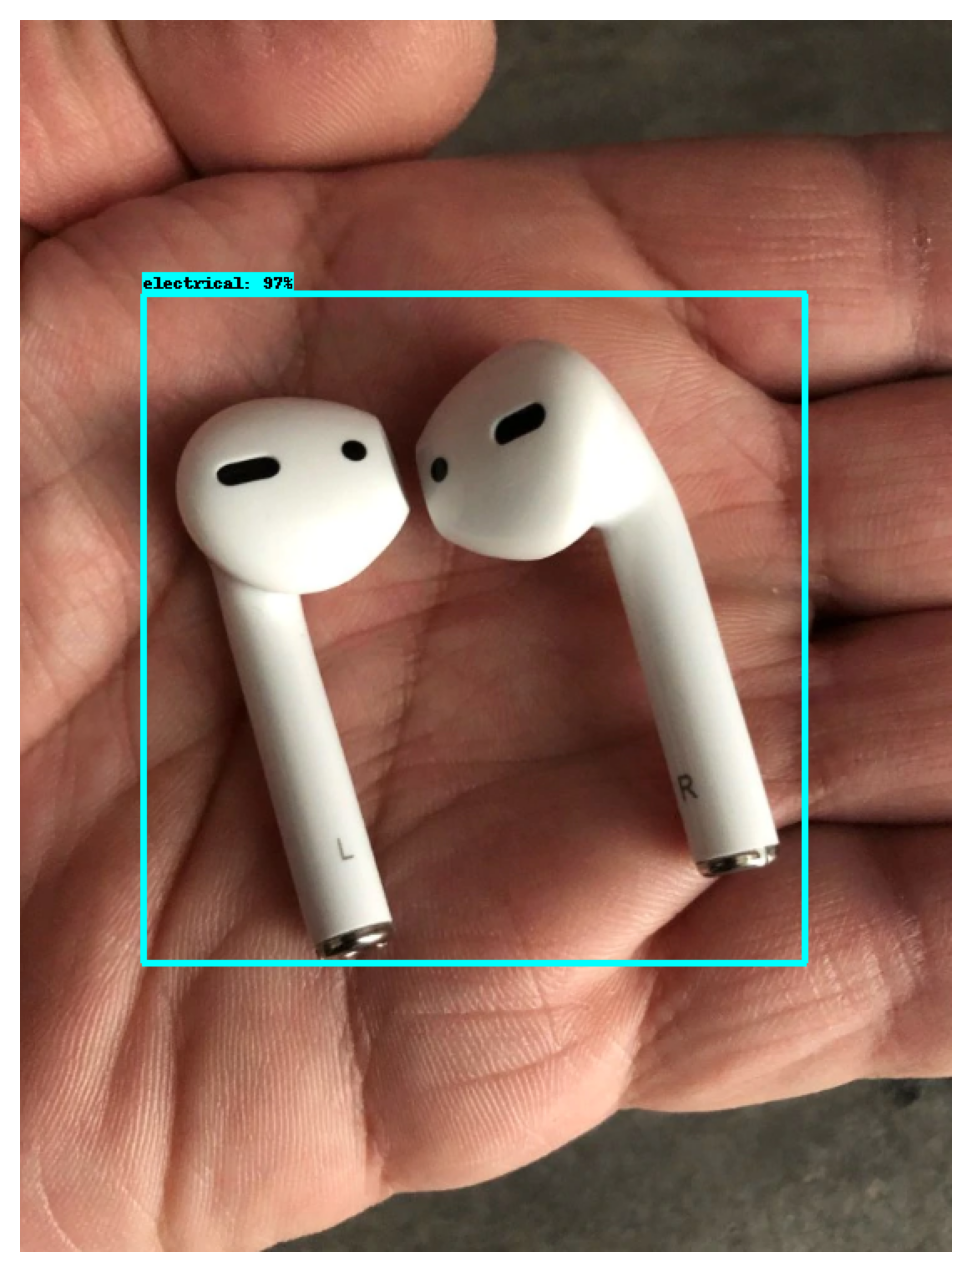

In [22]:
# Loading saved model
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from google.colab.patches import cv2_imshow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

IMAGE_SIZE = (12, 8) # Output display size as you want
import matplotlib.pyplot as plt
PATH_TO_SAVED_MODEL="/mydrive/customTF2/data/inference_graph/saved_model"
print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("/mydrive/customTF2/data/label_map.pbtxt",use_display_name=True)
#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

image_path = "/mydrive/customTF2/data/images/electrical_cables 29.jpg"
#print('Running inference for {}... '.format(image_path), end='')

image_np = load_image_into_numpy_array(image_path)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

input_tensor = input_tensor[:, :, :, :3]
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.4, # Adjust this value to set the minimum probability boxes to be classified as True
      agnostic_mode=False)
%matplotlib inline
plt.figure(figsize=IMAGE_SIZE, dpi=200)
plt.axis("off")
plt.imshow(image_np_with_detections)
plt.show()